# Case Study : Scaler - Clustering


- Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. 
- The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. 
- It is a product by InterviewBit.


### Business Problem 

- You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. 
- You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. 
- Ideally, these clusters should have similar characteristics.


### Data Dictionary:

- ‘Unnamed 0’ - Index of the dataset
- Email_hash - Anonymised Personal Identifiable Information (PII)
- Company - Current employer of the learner
- orgyear - Employment start date
- CTC - Current CTC
- Job_position - Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

# Exploratory data analysis:

### Importing required packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
# For pipeline creation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# FOr imputation to NAN values.
from sklearn.impute import SimpleImputer
import re

### Loading data into Dataframe:

In [3]:
scaler = pd.read_csv('scaler_clustering.txt')

In [4]:
scaler.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


### Identification of variables and data types:

In [5]:
scaler.shape

(205843, 7)

In [6]:
scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [7]:
cols = ['company_hash', 'email_hash', 'job_position']
for i in cols:
    scaler[i] = scaler[i].astype("category")
scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        205843 non-null  int64   
 1   company_hash      205799 non-null  category
 2   email_hash        205843 non-null  category
 3   orgyear           205757 non-null  float64 
 4   ctc               205843 non-null  int64   
 5   job_position      153281 non-null  category
 6   ctc_updated_year  205843 non-null  float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 14.8 MB


In [8]:
def features(df):
 
 print(f"Columns with category datatypes (Categorical Features) are : \
 {list(df.select_dtypes('category').columns)}")
 print('-'*125)
 print('-'*125)
 print(f"Columns with integer and float datatypes (Numerical Features) are: \
 {list(df.select_dtypes(['int64','float64']).columns)}")


In [9]:
features(scaler)

Columns with category datatypes (Categorical Features) are :  ['company_hash', 'email_hash', 'job_position']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:  ['Unnamed: 0', 'orgyear', 'ctc', 'ctc_updated_year']


In [10]:
scaler.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [11]:
scaler['company_hash'].unique()

['atrgxnnt xzaxv', 'qtrxvzwt xzegwgbb rxbxnta', 'ojzwnvwnxw vx', 'ngpgutaxv', 'qxen sqghu', ..., 'yjutq nqvwp', 'yga xzzgcvnxgz rvm ucn rna', 'ztdnowb xzwqtee', 'mrht onvnt axsxnvr', 'bvptbjnqxu td vbvkgz']
Length: 37300
Categories (37299, object): ['0', '0000', '01 ojztqsj', '05mz exzytvrny uqxcvnt rxbxnta', ..., 'zz', 'zzb ztdnstz vacxogqj ucn rna', 'zzgato', 'zzzbzb']

In [12]:
scaler['email_hash'].unique()

['6de0a4417d18ab14334c3f43397fc13b30c35149d70c0..., 'b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c1..., '4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e..., 'effdede7a2e7c2af664c8a31d9346385016128d66bbc5..., '6ff54e709262f55cb999a1c1db8436cb2055d8f79ab52..., ..., '53442a1663ccfdbd473055fee4e4ac9f4bb398dc44624..., '7f7292ffad724ebbe9ca860f515245368d714c84705b4..., 'cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018..., 'fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c..., '0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1...]
Length: 153443
Categories (153443, object): ['00003288036a44374976948c327f246fdbdf077854690..., '0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf..., '0000d58fbc18012bf6fa2605a7b0357d126ee69bc4103..., '000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d..., ..., 'fffcf97db1e9c13898f4eb4cd1c2fe862358480e10453..., 'fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b0..., 'ffff49f963e4493d8bbc7cc15365423d84a767259f720..., 'ffffa3eb3575f43b86d986911463dce7bcadcea227e5a...]

In [13]:
scaler=scaler.drop('Unnamed: 0',axis =1)
scaler.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


### Analysing the basic metrics:

In [14]:
scaler.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [15]:
scaler.describe(include=['category']).transpose()

,count,unique,top,freq
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153281,1017,Backend Engineer,43554


### Missing values and Outlier Treatment:

In [16]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [17]:
missing = missingValue(scaler)
missing[missing['Total Missing'] > 0]

Total records in our data =  205843 where missing values are as follows:


,Total Missing,In Percent
job_position,52562,25.53
orgyear,86,0.04
company_hash,44,0.02


In [18]:
missingValue(scaler)

Total records in our data =  205843 where missing values are as follows:


,Total Missing,In Percent
job_position,52562,25.53
orgyear,86,0.04
company_hash,44,0.02
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


### Observations:

- 1 numerical features and 2 categorical features are having missing values.


### Feature Engineering

In [19]:
(scaler['orgyear'])

0         2016.0
1         2018.0
2         2015.0
3         2017.0
4         2017.0
           ...  
205838    2008.0
205839    2017.0
205840    2021.0
205841    2019.0
205842    2014.0
Name: orgyear, Length: 205843, dtype: float64

In [20]:
(scaler['ctc_updated_year'])

0         2020.0
1         2019.0
2         2020.0
3         2019.0
4         2019.0
           ...  
205838    2019.0
205839    2020.0
205840    2021.0
205841    2019.0
205842    2016.0
Name: ctc_updated_year, Length: 205843, dtype: float64

### Creating ‘Years of Experience’ column by subtracting orgyear from current year

In [21]:
scaler['Years of Experience'] = scaler['ctc_updated_year']-scaler['orgyear']
scaler.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0


## Univariate Analysis:

In [22]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [23]:
numerical_cols = ['orgyear', 'ctc', 'ctc_updated_year']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

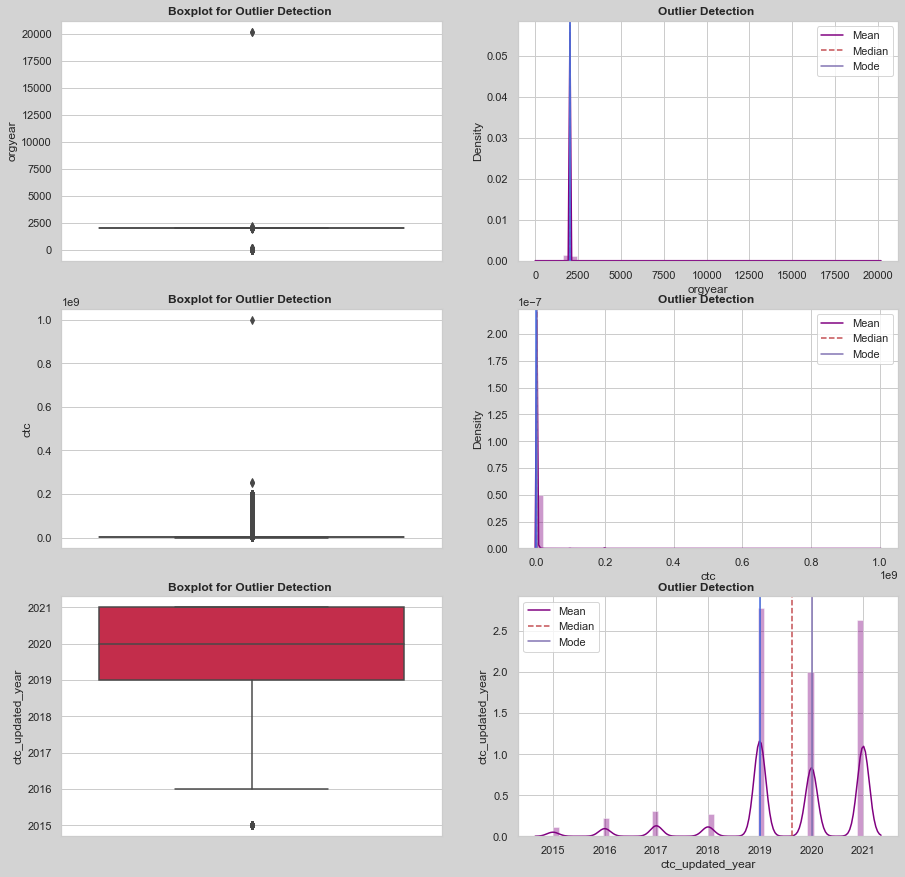

In [24]:
numerical_feat(scaler,numerical_cols,len(numerical_cols),2,15,15)

In [25]:
col_data = ['company_hash', 'email_hash', 'job_position']

In [ ]:
col_data.value_counts()

In [44]:
#EDA on Univariate Categorical variables

def cat_feat(col_data):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    #fig.suptitle(col_data.name+' wise ',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    #col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
    plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


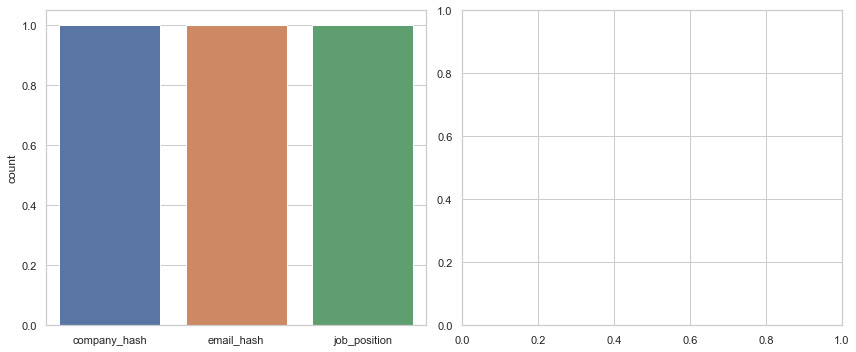

In [45]:
cat_feat(col_data)

In [27]:
print(f" Unique values in {i} are {scaler['job_position'].unique()}")

 Unique values in job_position are ['Other', 'FullStack Engineer', 'Backend Engineer', NaN, 'iOS Engineer', ..., 'Applied Scientist', 'Member Technical Staff III', 'Web / UI Designer', 'Azure data Factory', 'Android Application developer']
Length: 1018
Categories (1017, object): [' SDE 2', '.', '..', '.7', ..., 'support escalation engineer', 'system engineer', 'system software engineer', 'technology analyst']


# Bivariate Analysis 
### Categorical variables

In [35]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("peachpuff")
    rows=0
    string=" based Distribution"
    for var in colname:
        string= var + string 
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14)
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14)
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][0].set_xlabel(var, fontweight="bold",fontsize=14)
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][1].set_xlabel(var, fontweight="bold",fontsize=14)
        rows+=1
        string = " based Distribution"
    plt.show()  

In [ ]:
cat_bi_analysis(scaler,col_data,'ctc',6,2,20,36)

# Data Pre-processing:

## Regex for cleaning company names

In [52]:
scaler['company_hash']=re.sub('[^A-Za-z0-9]+','', scaler['company_hash'])

'[0-9]+Airtel[0-9]+X[0-9]+Labs'

In [ ]:
scalercopy=scaler.copy()

# Missing values fill along with feature engineering columns

In [ ]:
# Creating a dictionary named "Email_dict" so that we can apply the aggregate function on the new dataset 
# with feature engineered columns and discarding old columns and columns with  Unknown field

Email_ID_dict = {
    'email_hash' :'first',
    'company_hash' :'first',
    'orgyear' : 'first',
    'ctc' :'last',
    'job_position' :'first',
    'ctc_updated_year' :'first',
    'Years of Experience':'first'  
}

In [ ]:
Email_ID_dict_df=scaler.groupby('Driver_ID').agg(Email_ID_dict).reset_index(drop = True)
Email_ID_dict

## Mean/ KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(Email_ID_dict)
scalercopy=imputer.transform(Email_ID_dict)

In [30]:
Email_ID_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   company_hash         205799 non-null  category
 1   email_hash           205843 non-null  category
 2   orgyear              205757 non-null  float64 
 3   ctc                  205843 non-null  int64   
 4   job_position         153281 non-null  category
 5   ctc_updated_year     205843 non-null  float64 
 6   Years of Experience  205757 non-null  float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 14.8 MB


In [31]:
missingValue(Email_ID_dict)

Total records in our data =  205843 where missing values are as follows:


,Total Missing,In Percent
job_position,52562,25.53
orgyear,86,0.04
Years of Experience,86,0.04
company_hash,44,0.02
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


In [55]:
scalercopy

,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,2016.0,1100000,Other,2020.0,4.0
1,2018.0,449999,FullStack Engineer,2019.0,1.0
2,2015.0,2000000,Backend Engineer,2020.0,5.0
3,2017.0,700000,Backend Engineer,2019.0,2.0
4,2017.0,1400000,FullStack Engineer,2019.0,2.0
...,...,...,...,...,...
205838,2008.0,220000,NaN,2019.0,11.0
205839,2017.0,500000,NaN,2020.0,3.0
205840,2021.0,700000,NaN,2021.0,0.0
205841,2019.0,5100000,NaN,2019.0,0.0


In [ ]:
scalercopy=scalercopy.drop('company_hash',axis =1)
scalercopy=scalercopy.drop('email_hash',axis =1)
scalercopy=scalercopy.drop('job_position',axis =1)

In [59]:
scalercopy.head()

,orgyear,ctc,ctc_updated_year,Years of Experience
0,2016.0,1100000,2020.0,4.0
1,2018.0,449999,2019.0,1.0
2,2015.0,2000000,2020.0,5.0
3,2017.0,700000,2019.0,2.0
4,2017.0,1400000,2019.0,2.0


In [ ]:
# Correlation between numerical variables

plt.figure(figsize=(10,5))
sns.heatmap(Email_ID_dict.corr(method="pearson"),annot=True)
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

## Standardization & Encoding

In [60]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(scalercopy)
X=scale.transform(scalercopy)

# Manual Clustering

In [32]:
scaler.groupby(['company_hash'])['ctc'].describe()

,count,mean,std,min,25%,50%,75%,max
company_hash,,,,,,,,
0,2.0,100000.0,0.000000,100000.0,100000.0,100000.0,100000.0,100000.0
0000,1.0,300000.0,NaN,300000.0,300000.0,300000.0,300000.0,300000.0
01 ojztqsj,2.0,550000.0,395979.797464,270000.0,410000.0,550000.0,690000.0,830000.0
05mz exzytvrny uqxcvnt rxbxnta,2.0,1100000.0,0.000000,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,2.0,175000.0,106066.017178,100000.0,137500.0,175000.0,212500.0,250000.0
...,...,...,...,...,...,...,...,...
zyvzwt wgzohrnxzs tzsxzttqo,1.0,940000.0,NaN,940000.0,940000.0,940000.0,940000.0,940000.0
zz,2.0,935000.0,615182.899632,500000.0,717500.0,935000.0,1152500.0,1370000.0
zzb ztdnstz vacxogqj ucn rna,2.0,600000.0,0.000000,600000.0,600000.0,600000.0,600000.0,600000.0


In [34]:
scaler.groupby(['company_hash','job_position','Years of Experience'])['ctc'].describe()

count  \
company_hash                   job_position       Years of Experience          
0                              Other              0.0                    1.0   
0000                           Other              3.0                    1.0   
01 ojztqsj                     Android Engineer   3.0                    1.0   
                               Frontend Engineer  8.0                    1.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2.0                    1.0   
...                                                                      ...   
zyuw rxbxnta                   Frontend Engineer  13.0                   1.0   
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7.0                    1.0   
zz                             Other              7.0                    1.0   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 4.0                    1.0   
zzzbzb                         Other              30.0                   1.0   

                                                                            mean  \
company_hash                   job_position       Years of Experience              
0                              Other              0.0                   100000.0   
0000                           Other              3.0                   300000.0   
01 ojztqsj                     Android Engineer   3.0                   270000.0   
                               Frontend Engineer  8.0                   830000.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2.0                  1100000.0   
...                                                                          ...   
zyuw rxbxnta                   Frontend Engineer  13.0                 2400000.0   
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7.0                   940000.0   
zz                             Other              7.0                  1370000.0   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 4.0                   600000.0   
zzzbzb                         Other              30.0                  720000.0   

                                                                       std  \
company_hash                   job_position       Years of Experience        
0                              Other              0.0                  NaN   
0000                           Other              3.0                  NaN   
01 ojztqsj                     Android Engineer   3.0                  NaN   
                               Frontend Engineer  8.0                  NaN   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2.0                  NaN   
...                                                                    ...   
zyuw rxbxnta                   Frontend Engineer  13.0                 NaN   
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7.0                  NaN   
zz                             Other              7.0                  NaN   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 4.0                  NaN   
zzzbzb                         Other              30.0                 NaN   

                                                                             min  \
company_hash                   job_position       Years of Experience              
0                              Other              0.0                   100000.0   
0000                           Other              3.0                   300000.0   
01 ojztqsj                     Android Engineer   3.0                   270000.0   
                               Frontend Engineer  8.0                   830000.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2.0                  1100000.0   
...                                                                          ...   
zyuw rxbxnta                   Frontend Engineer  13.0                 2400000.0   
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7.0                   940000.0   
zz                             Other              7.0                  1370000.0  

#  K- means clustering

In [66]:
#Perform the k-means algorithm to cluster the points
def k_means(points, centroids):
  groups = [[] for i in range(len(centroids))]
  for pnt in points:
    
    #tmp is a list to store the distance of points from each centroid. tmp[j] is the distance of jth centroid from pnt
    tmp = [0]*len(centroids)
    for i,centroid in enumerate(centroids):
      tmp[i] = calc_dist(pnt, centroid)

    #calculate the minimum distance from a centroid from all the centroid distances
    min_d = min(tmp)
    group_id = tmp.index(min_d)

    #store the point into the list of that nearest centroid
    groups[group_id].append(pnt)

  new_centroid = []
  #update the centroids of each cluster
  for lst in groups:
    #update the centroid
    new_centroid.append(upd_centroid(lst))
  return new_centroid

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(scalercopy)

In [ ]:
clusters['label'] = kmeans.labels_

plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel('n_clicks')
plt.ylabel('amount_spent');

# Elbow method

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

# Silhouette Score

The silhouette score of a point measures how close that point lies to its nearest neighbor points, across all clusters.

It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering.

An instance’s silhouette coefficient is equal to  (𝑏–𝑎)𝑚𝑎𝑥(𝑎,𝑏) , where;

𝑎  is the the mean intra-cluster distance (i.e., mean distance to the other instances in the same cluster)

𝑏  is the nearest mean inter-cluster distance (i.e., the mean distance to the instances of the next closest cluster). It is defined such that the instance’s own cluster is excluding.

The range of Silhouette score is [-1, 1].

Score is  1  when  𝑏>𝑎  and  𝑎=0 
implying that the points in the same cluster are very close.
In this case the points within the same cluster are very close whereas the points in the other clusters are at some distance.

Score is  −1  when  𝑎>𝑏  and  𝑏=0 
In this case the points from the same cluster of the current instance are at some distance but the points from the other clusters are overlapping with the current instance.

Ideally we want our Silhouette score to be closer to  1 , because we do want that our inter-cluster distances should be greater than intra-cluster distances.

This is a more precise alternative to Inertia (within cluster sum of squares (also called SSE)) and Elbow curve!

A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances.

Interpreting Silhouette scores
A coefficient close to  +1  means that the instance is well inside its own cluster and far from other clusters,

While a coefficient close to  0  means that it is close to a cluster boundary,

A coefficient close to  –1  means that the instance may have been assigned to the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# Hierarchical Clustering

In [ ]:
scaled_df = pd.DataFrame(X, columns=df_stocks.columns, index=df_stocks.index)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

# Recommendations:

- Kindly Focus on the above hashed best companies and job positions to work. 
- The Hierarchical model clusters them on the basis of their job profile, company, and other features. 